### 0. Importing the libraries

In this case we are going to import pandas, numpy and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Online deliveries dataset

drop duplicate rows, and inspect the data.

https://www.kaggle.com/benroshan/online-food-delivery-preferencesbangalore-region/version/3

In [3]:
dataset_with_duplicates = pd.read_csv("onlinedeliverydata.csv")

dataset=dataset_with_duplicates.drop_duplicates()

dataset.sample(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
289,20,Female,Single,Student,No Income,Graduate,2,13.0734,77.5464,560014,...,Moderately Important,Important,Important,Slightly Important,Slightly Important,Very Important,Important,Important,Yes,Delivery people are sweet and fast
147,24,Female,Single,Student,No Income,Post Graduate,4,13.0496,77.4941,560073,...,Very Important,Very Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
130,28,Male,Married,Employee,More than 50000,Post Graduate,3,13.0019,77.5713,560003,...,Important,Important,Slightly Important,Important,Important,Very Important,Important,Very Important,Yes,I'm satisfied with the current service of swig...
28,23,Female,Single,Employee,10001 to 25000,Graduate,3,12.9854,77.7081,560048,...,Important,Important,Moderately Important,Moderately Important,Important,Important,Important,Important,Yes,NIL
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
102,22,Female,Single,Employee,10001 to 25000,Graduate,3,12.9698,77.7500,560066,...,Very Important,Important,Moderately Important,Important,Very Important,Very Important,Important,Important,Yes,NIL
299,25,Female,Single,Employee,More than 50000,Post Graduate,6,13.0140,77.5658,560012,...,Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Very Important,No,I'd rather cook at home during covid-19
142,25,Male,Married,Employee,25001 to 50000,Graduate,2,12.9980,77.6227,560005,...,Important,Important,Very Important,Very Important,Moderately Important,Moderately Important,Important,Moderately Important,Yes,I'm okay ordering online for food
121,26,Male,Single,Self Employeed,25001 to 50000,Graduate,3,12.9766,77.5993,560001,...,Important,Important,Slightly Important,Slightly Important,Important,Important,Important,Important,Yes,I have no problem with the delivery service. I...
262,21,Male,Single,Student,No Income,Graduate,2,12.9570,77.5637,560018,...,Important,Important,Moderately Important,Important,Moderately Important,Moderately Important,Important,Important,No,If it is from a low rated restaurant. I restri...


### 2. Data cleaning

Subset the dataset for finding marteting target, target
    - Age
    - Gender
    - Marital Status
    - Occupation   
    - Educational Qualifications
    - Family size

<AxesSubplot:>

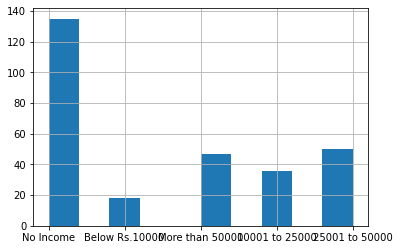

In [4]:
# It is dusious that users input their actual income into the site. 
dataset['Monthly Income'].hist()

In [5]:
target = dataset[['Age','Gender','Marital Status','Occupation','Educational Qualifications','Family size']]
target.sample(5)

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size
247,25,Male,Single,Self Employeed,School,3
160,21,Male,Single,Student,Graduate,2
251,21,Male,Single,Student,Graduate,6
282,23,Male,Single,Student,Graduate,4
242,28,Male,Married,Employee,Graduate,3


### 3. Correcting data types

Subset the dataset for finding business strategy
    - Less Delivery time
    - High Quality of package
    - Number of calls
    - Politeness
    - Freshness
    - Temperature
    - Good Taste
    - Good Quantity

In [7]:
strategy= dataset[['Less Delivery time','High Quality of package','Number of calls','Politeness','Freshness ','Temperature','Good Taste ','Good Quantity']]
strategy.sample(10)

,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
35,Moderately Important,Very Important,Very Important,Moderately Important,Very Important,Very Important,Very Important,Important
268,Important,Very Important,Slightly Important,Moderately Important,Slightly Important,Moderately Important,Slightly Important,Very Important
71,Very Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Very Important
39,Moderately Important,Moderately Important,Slightly Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important
242,Very Important,Very Important,Very Important,Very Important,Important,Important,Important,Very Important
179,Important,Important,Very Important,Important,Moderately Important,Important,Important,Moderately Important
157,Important,Very Important,Important,Very Important,Moderately Important,Slightly Important,Important,Important
297,Slightly Important,Moderately Important,Slightly Important,Unimportant,Unimportant,Unimportant,Slightly Important,Slightly Important
289,Moderately Important,Important,Important,Slightly Important,Slightly Important,Very Important,Important,Important
70,Very Important,Very Important,Unimportant,Slightly Important,Very Important,Moderately Important,Very Important,Important


In [8]:
# 'Moderately Important', 'Very Important', 'Important','Slightly Important', 'Unimportant'

strategy_no=strategy.replace(to_replace=['Very Important','Moderately Important','Important','Slightly Important', 'Unimportant'],value=[5,4,3,2,1])
strategy_no

,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
0,4,4,4,4,4,4,4,4
1,5,5,5,5,5,5,5,5
2,3,5,4,5,5,3,5,4
3,5,3,4,5,5,5,5,3
4,3,3,4,3,3,3,5,5
...,...,...,...,...,...,...,...,...
299,3,3,5,5,3,5,5,5
321,3,3,5,3,4,3,3,4
342,1,2,1,1,5,5,5,5
363,3,3,5,3,4,3,3,4


In [9]:
# check data type
print(strategy_no.dtypes)

Less Delivery time         int64
High Quality of package    int64
Number of calls            int64
Politeness                 int64
Freshness                  int64
Temperature                int64
Good Taste                 int64
Good Quantity              int64
dtype: object


### 4. Exploring app categories

(1) Target Users
(2) Menu size
(3) Customer's Priority

<AxesSubplot:>

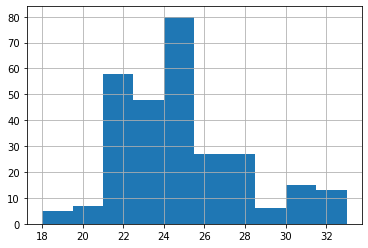

In [10]:
# Most users who place online orders are in their early 20s.
target['Age'].hist(bins=10)

In [11]:
# Male users are about 30% more female users.
target['Gender'].value_counts()

Male      164
Female    122
Name: Gender, dtype: int64

In [12]:
# Single users are about 200% more married users.
target['Marital Status'].value_counts()

Single               192
Married               85
Prefer not to say      9
Name: Marital Status, dtype: int64

In [13]:
# Student users are half of whole users.
target['Occupation'].value_counts()

Student           147
Employee           93
Self Employeed     37
House wife          9
Name: Occupation, dtype: int64

In [14]:
# Most users are highly educated people.
target['Educational Qualifications'].value_counts()

Post Graduate    130
Graduate         122
Ph.D              21
School            11
Uneducated         2
Name: Educational Qualifications, dtype: int64

<AxesSubplot:>

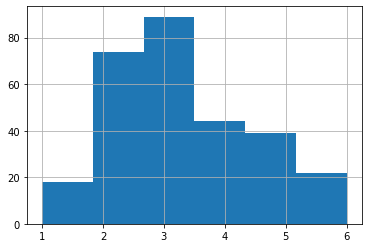

In [15]:
# Single-person families have a small proportion, and families with three or more people place a lot of orders.
target['Family size'].hist(bins=6)

In [16]:
# Top priority is 'Good Taste','Good Quantity' and 'High Quality of Package'
strategy_srt=strategy_no.mean().sort_values(ascending=False)
strategy_srt

Good Taste                 3.951049
Good Quantity              3.891608
High Quality of package    3.804196
Temperature                3.786713
Freshness                  3.695804
Politeness                 3.625874
Number of calls            3.486014
Less Delivery time         3.335664
dtype: float64